In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

Steps involved :
1. Understand the data
2. Preprocess the data
3. Create a data
4. Fit the model
5. Evaluate
6. Adjust different hyperparameters and improve the model.
7. Repeat until satisfied


In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", 'r')
zip_ref.extractall()
zip_ref.close()

--2023-08-10 00:26:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.128, 142.250.1.128, 108.177.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   157MB/s    in 3.2s    

2023-08-10 00:26:30 (157 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [3]:
import os

#Walkthrough the 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

In [10]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [5]:
#get the classnames from the dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:

# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


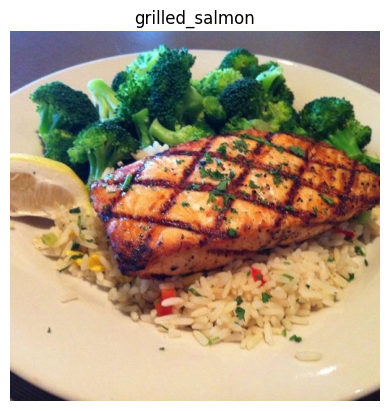

In [14]:
#view any random image from the dataset
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

Preprocessing the data

In [15]:
img

array([[[ 93, 109, 161],
        [ 94, 110, 162],
        [ 90, 106, 158],
        ...,
        [ 90,  86, 109],
        [ 81,  77, 100],
        [ 81,  77, 100]],

       [[ 94, 110, 162],
        [ 95, 111, 163],
        [ 94, 110, 162],
        ...,
        [ 90,  86, 109],
        [ 86,  82, 105],
        [ 85,  81, 104]],

       [[ 93, 109, 161],
        [ 94, 110, 162],
        [ 95, 110, 165],
        ...,
        [ 86,  83, 104],
        [ 89,  86, 107],
        [ 84,  81, 102]],

       ...,

       [[ 99,  79,  78],
        [ 85,  67,  67],
        [ 65,  49,  50],
        ...,
        [ 23,  19,  33],
        [ 23,  20,  31],
        [ 22,  19,  30]],

       [[113,  92,  87],
        [102,  81,  78],
        [ 85,  67,  65],
        ...,
        [ 23,  19,  33],
        [ 23,  20,  31],
        [ 22,  19,  30]],

       [[123, 100,  94],
        [114,  93,  88],
        [106,  87,  83],
        ...,
        [ 23,  19,  33],
        [ 23,  20,  31],
        [ 22,  19,  30]]

In [17]:
# check the shape for width, height and color channels
img.shape

(512, 512, 3)

In [18]:
# get all pixel values between 0 and 1
img/255.

array([[[0.36470588, 0.42745098, 0.63137255],
        [0.36862745, 0.43137255, 0.63529412],
        [0.35294118, 0.41568627, 0.61960784],
        ...,
        [0.35294118, 0.3372549 , 0.42745098],
        [0.31764706, 0.30196078, 0.39215686],
        [0.31764706, 0.30196078, 0.39215686]],

       [[0.36862745, 0.43137255, 0.63529412],
        [0.37254902, 0.43529412, 0.63921569],
        [0.36862745, 0.43137255, 0.63529412],
        ...,
        [0.35294118, 0.3372549 , 0.42745098],
        [0.3372549 , 0.32156863, 0.41176471],
        [0.33333333, 0.31764706, 0.40784314]],

       [[0.36470588, 0.42745098, 0.63137255],
        [0.36862745, 0.43137255, 0.63529412],
        [0.37254902, 0.43137255, 0.64705882],
        ...,
        [0.3372549 , 0.3254902 , 0.40784314],
        [0.34901961, 0.3372549 , 0.41960784],
        [0.32941176, 0.31764706, 0.4       ]],

       ...,

       [[0.38823529, 0.30980392, 0.30588235],
        [0.33333333, 0.2627451 , 0.2627451 ],
        [0.25490196, 0

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#rescale
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

#Load data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224,3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax') #since we have 10 classes, and use softmax since we have more than 2 classes
])

model_1.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [21]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 143ms/step - loss: 2.1735 - accuracy: 0.1835 - val_loss: 2.0988 - val_accuracy: 0.2160
Epoch 2/5
235/235 [==============================] - 33s 141ms/step - loss: 2.0146 - accuracy: 0.2817 - val_loss: 1.9731 - val_accuracy: 0.3068
Epoch 3/5
235/235 [==============================] - 29s 123ms/step - loss: 1.6542 - accuracy: 0.4309 - val_loss: 1.9990 - val_accuracy: 0.3048
Epoch 4/5
235/235 [==============================] - 30s 129ms/step - loss: 1.0878 - accuracy: 0.6380 - val_loss: 2.4345 - val_accuracy: 0.2788
Epoch 5/5
235/235 [==============================] - 29s 123ms/step - loss: 0.4743 - accuracy: 0.8468 - val_loss: 3.5948 - val_accuracy: 0.2796


In [27]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [24]:
pd.DataFrame(history_1.history)

,loss,accuracy,val_loss,val_accuracy
0,2.173537,0.183467,2.098764,0.2160
1,2.014574,0.281733,1.973127,0.3068
2,1.654246,0.430933,1.998999,0.3048
3,1.087788,0.638000,2.434480,0.2788
4,0.474269,0.846800,3.594764,0.2796


In [25]:
def plot_loss_curve(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label='validation_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label ='validation_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

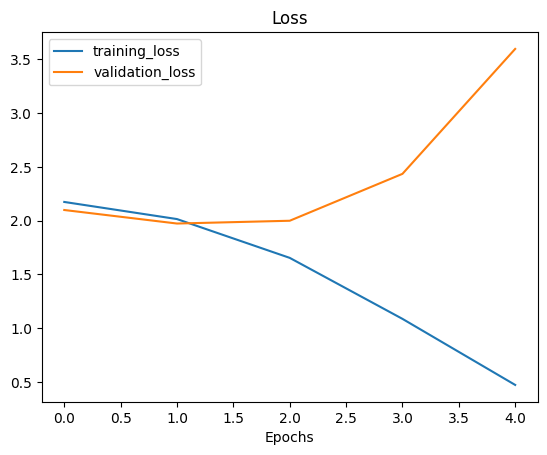

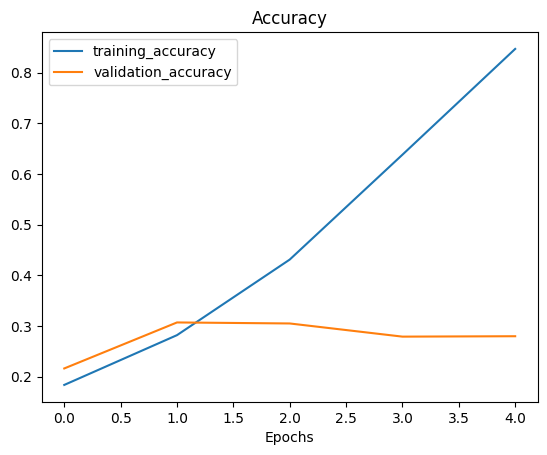

In [26]:
plot_loss_curve(history_1)

In [28]:
# the model doesn't work well, the loss curve is supposed to go down, and accuracy go up. Its overfitting itself and performs poorly on the test dataset
model_1.evaluate(test_data)

79/79 [==============================] - 13s 169ms/step - loss: 3.5948 - accuracy: 0.2796


[3.5947649478912354, 0.27959999442100525]

In [29]:
model_2 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [30]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data= test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 31s 119ms/step - loss: 2.2403 - accuracy: 0.1808 - val_loss: 2.0263 - val_accuracy: 0.3008
Epoch 2/5
235/235 [==============================] - 31s 134ms/step - loss: 1.8259 - accuracy: 0.3641 - val_loss: 1.9733 - val_accuracy: 0.3136
Epoch 3/5
235/235 [==============================] - 27s 116ms/step - loss: 1.3492 - accuracy: 0.5644 - val_loss: 2.0101 - val_accuracy: 0.3268
Epoch 4/5
235/235 [==============================] - 32s 137ms/step - loss: 0.8345 - accuracy: 0.7429 - val_loss: 2.4319 - val_accuracy: 0.3064
Epoch 5/5
235/235 [==============================] - 28s 118ms/step - loss: 0.4459 - accuracy: 0.8748 - val_loss: 2.8527 - val_accuracy: 0.2888


In [31]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [32]:
pd.DataFrame(history_2.history)

,loss,accuracy,val_loss,val_accuracy
0,2.240350,0.180800,2.026281,0.3008
1,1.825925,0.364133,1.973342,0.3136
2,1.349247,0.564400,2.010090,0.3268
3,0.834484,0.742933,2.431922,0.3064
4,0.445856,0.874800,2.852663,0.2888


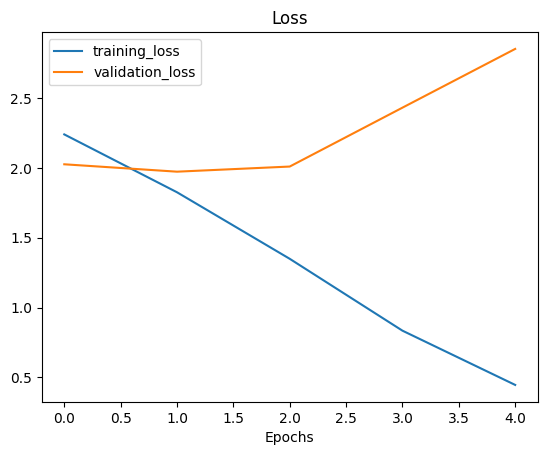

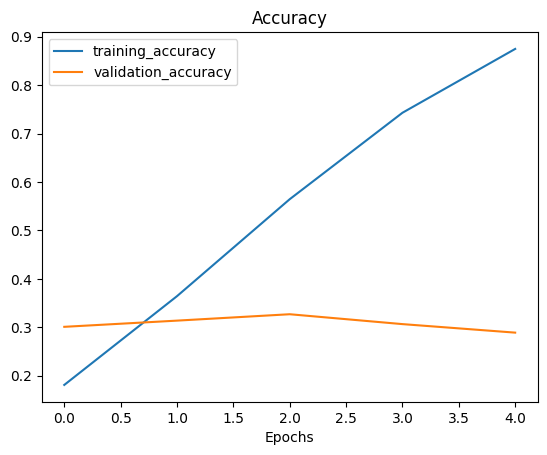

In [33]:
plot_loss_curve(history_2)

In [35]:
# still not that great
model_2.evaluate(test_data)

79/79 [==============================] - 7s 85ms/step - loss: 2.8527 - accuracy: 0.2888


[2.8526628017425537, 0.2888000011444092]

Try augmenting the datasets to check and see if that improves the accuracy

In [36]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [37]:
model_3 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [40]:
history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data= test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 102s 432ms/step - loss: 2.0657 - accuracy: 0.2647 - val_loss: 1.9618 - val_accuracy: 0.3284
Epoch 2/5
235/235 [==============================] - 100s 425ms/step - loss: 2.0239 - accuracy: 0.2909 - val_loss: 1.9032 - val_accuracy: 0.3528
Epoch 3/5
235/235 [==============================] - 102s 435ms/step - loss: 2.0011 - accuracy: 0.3017 - val_loss: 1.8749 - val_accuracy: 0.3560
Epoch 4/5
235/235 [==============================] - 102s 431ms/step - loss: 1.9687 - accuracy: 0.3179 - val_loss: 1.8237 - val_accuracy: 0.3712
Epoch 5/5
235/235 [==============================] - 102s 436ms/step - loss: 1.9477 - accuracy: 0.3253 - val_loss: 1.8440 - val_accuracy: 0.3700


In [41]:
pd.DataFrame(history_3.history)

,loss,accuracy,val_loss,val_accuracy
0,2.065711,0.264667,1.961823,0.3284
1,2.023938,0.290933,1.903207,0.3528
2,2.001137,0.301733,1.874879,0.3560
3,1.968714,0.317867,1.823715,0.3712
4,1.947732,0.325333,1.844019,0.3700


In [42]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 29160)             0         
                                                                 
 dense_2 (Dense)             (None, 10)               

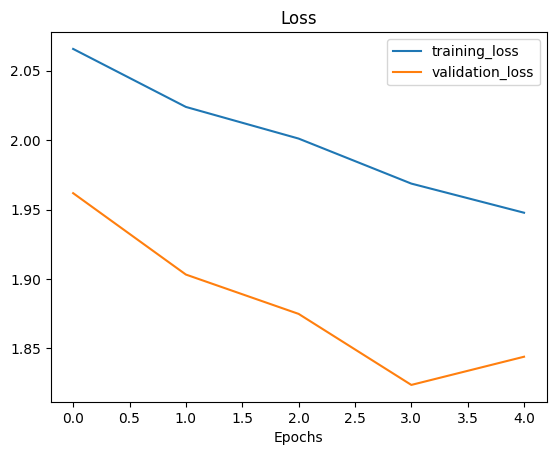

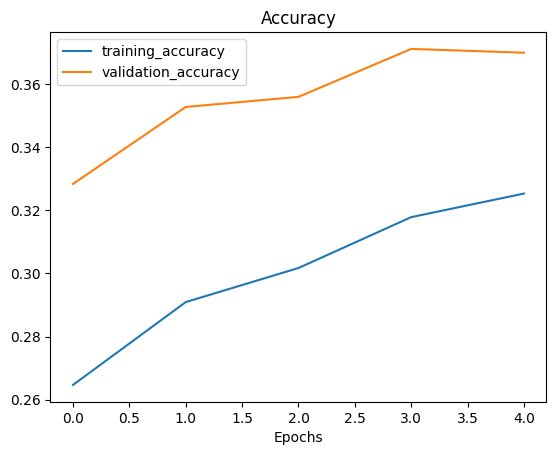

In [43]:
plot_loss_curve(history_3)

In [44]:
model_3.evaluate(test_data)

79/79 [==============================] - 8s 100ms/step - loss: 1.8440 - accuracy: 0.3700


[1.8440197706222534, 0.3700000047683716]